In [1]:
#Imports and matplotlib styling.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['legend.facecolor']= "white"
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = "#aaaaaa"
plt.rcParams['figure.figsize'] = (5.0,4.)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.titlesize']='medium'

In [2]:
#Data given as training set
X = np.array([[1,8],[6,2],[3,6],[4,4],[3,1],[1,6],[6,10],[7,7],[6,11],[10,5],[4,11]])
z = np.array([1,1,1,1,1,1,-1,-1,-1,-1,-1])

#Initial weights and bias provided
weights = np.array([-0.19754472,-0.16175777]) #W0 and W1 are weight for X1 and X2
bias = 1.96331786

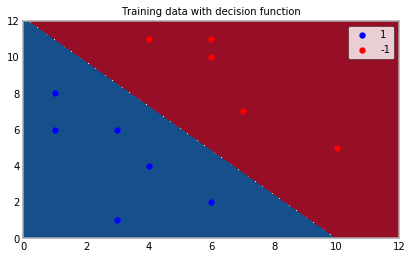

In [3]:

#Visualize the data. Defining a reusable function called to visualize data points and decision function.
def plot_data_with_regions(predict_fn=lambda x: x.dot(weights.T)+bias,only_points=False):
    '''
    Plots the data points as well as the decision regions. 
    Inputs:
        predict_fn: function used to predict. Going to pass it X of shape [num_samples,input_len]
        only_points: Don't plot the decision function.
    '''
    plt.gca().patch.set_facecolor('white')
    plt.title("Training Data",fontsize=12)
    if not only_points:
        #Create a grid of points at a certain resolution so we can predict on it and find classification regions.
        xx, yy = np.meshgrid(np.arange(0, 12, 0.01),np.arange(0, 12, 0.01))
        #Predict on every single one of the mesh points
        meshvals = predict_fn(np.c_[xx.ravel(), yy.ravel()])
        #Thresh them so we don't have a gradient.
        meshvals[meshvals<0]= -1
        meshvals[meshvals>=0] = 1
        plt.contourf(xx, yy, meshvals.reshape(xx.shape), cmap=plt.cm.RdBu)
        
        # set axes range
        plt.xlim(0, 12)
        plt.ylim(0, 12)
        plt.title("Training data with decision function")
        
    #Draw the actual training points as a scatterplot
    plt.scatter(X[z==1,0],X[z==1,1],c="blue",s=40,lw=0,label="1")
    plt.scatter(X[z==-1,0],X[z==-1,1],c="red",s=40,lw=0,label="-1")
    plt.legend(scatterpoints=1,loc='upper right')
    

    plt.show()
    
plot_data_with_regions(lambda x: x.dot(weights.T)+bias)

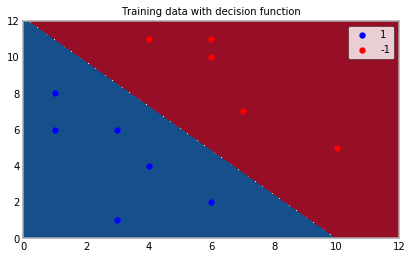

In [4]:
plot_data_with_regions(lambda x: (7*x.dot(weights.T)+7*bias))

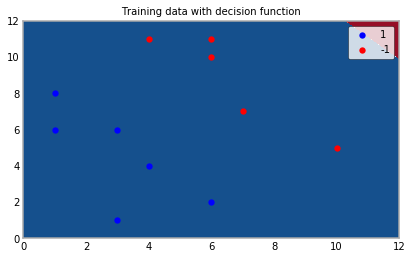

In [5]:
plot_data_with_regions(lambda x: (x.dot(weights.T)+bias+2))

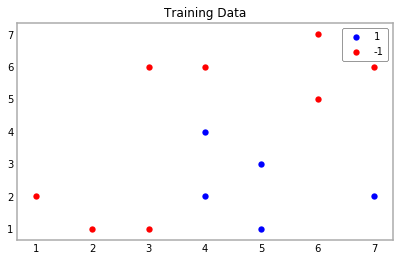

In [6]:
X = np.array([[4,2],[4,4],[5,3],[5,1],[7,2],[1,2],[2,1],[3,1],[6,5],[3,6],[6,7],[4,6],[7,6]])
z = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])
plt.gca().grid(False)
plot_data_with_regions(lambda x: x.dot(weights.T)+bias,True)

In [7]:
x = np.random.randn(2,10)
y = np.random.randint(0,2,10)

In [8]:
y

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

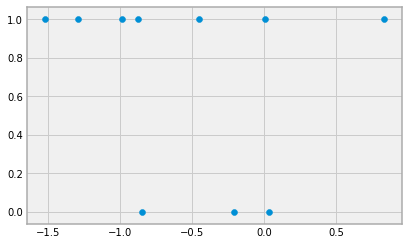

In [9]:
plt.scatter(x[0],y)

In [10]:
import sklearn.datasets
x,y = sklearn.datasets.make_circles(200,noise=0.05,factor=0.1)

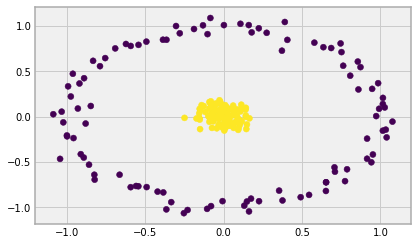

In [11]:
plt.scatter(x[:,0],x[:,1],c=y)

In [12]:
x2 = (x[:,0]**2+x[:,1]**2)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'X^2+Y^2')

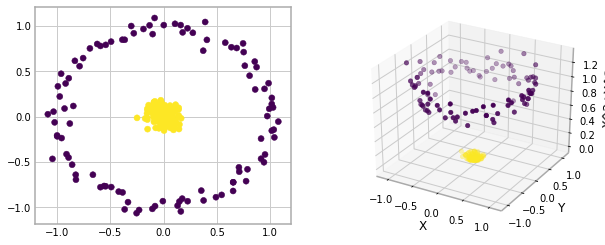

In [14]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(121)
plt.gca().patch.set_facecolor('white')
plt.scatter(x[:,0],x[:,1],c=y)
ax = fig.add_subplot(122, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.scatter(xs = x[:,0],ys = x[:,1],zs= x2,c=y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('X^2+Y^2')